In [1]:
#import necessary packages, etc.
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

Problem 1:

The dataset tip.csv contains data on tips from a resturant. I will manipulate this data set to build histograms.

Part A: Find the mean tip by gender. Build a histogram of tips for males overlaid with a histogram of tips for females

The data set tips.csv is read and displayed:

In [5]:
tips = Table.read_table('tips.csv')
tips

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.5,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4
8.77,2,Male,No,Sun,Dinner,2
26.88,3.12,Male,No,Sun,Dinner,4
15.04,1.96,Male,No,Sun,Dinner,2
14.78,3.23,Male,No,Sun,Dinner,2


The mean tips broken down by male and female:

In [43]:
average_male_tips = str(round(np.average(tips.where('sex', 'Male').column('tip')),2))
average_female_tips = str(round(np.average(tips.where('sex', 'Female').column('tip')),2))

print('The average male tips '+average_male_tips+ ". The average female tips "+average_female_tips+".")

The average male tips 3.09. The average female tips 2.83.


A histogram of tips for males overlaid with anhistogram of tips for females:

C:\Users\C20Han.Zhang\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


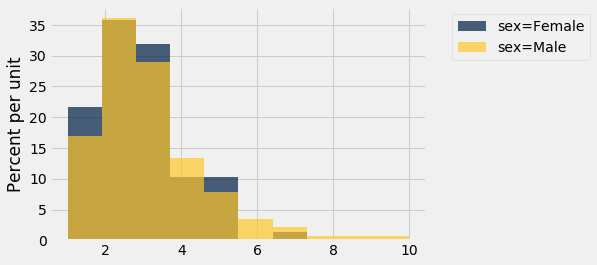

In [38]:
tips.hist('tip', group = 'sex')

The mean tips broken down by time, lunch and dinner:

In [45]:
average_dinner_tips = str(round(np.average(tips.where('time', 'Dinner').column('tip')),2))
average_lunch_tips = str(round(np.average(tips.where('time', 'Lunch').column('tip')),2))

print('The average dinner tip is '+average_dinner_tips+ ". The average lunch tip is "+average_lunch_tips+".")

The average dinner tip is 3.1. The average lunch tip is 2.73.


A historgram of tips for dinner time overlaid with a histogram of tips for lunch time:

C:\Users\C20Han.Zhang\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


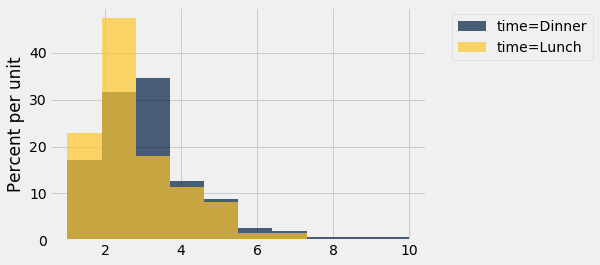

In [43]:
tips.hist('tip', group = 'time')

Problem 2:

I will create a function that inputs a string denoting day of the week (Mon, Tues, Wed, Thur, Fri, Sat, Sun), and returns a number (Mon = 1, Tues = 2, … Sun = 7).

In [5]:
def weekday_to_num(day):
        if day == "Mon": 
            return 1
        elif day == "Tue":
            return 2
        elif day == "Wed":
            return 3
        elif day == "Thurs":
            return 4
        elif day == "Fri":
            return 5
        elif day == "Sat":
            return 6
        elif day == "Sun":
            return 7            

Problem 3:

I will apply the weekday_to_num function to the 'day' column of ips and include the result as a new cloumn in tips called 'weekday_num;

In [23]:
num_days = tips.apply(weekday_to_num, 'day')
tips_num = tips.with_column('weekday_num', num_days)
tips_num

total_bill,tip,sex,smoker,day,time,size,weekday_num
16.99,1.01,Female,No,Sun,Dinner,2,7
10.34,1.66,Male,No,Sun,Dinner,3,7
21.01,3.5,Male,No,Sun,Dinner,3,7
23.68,3.31,Male,No,Sun,Dinner,2,7
24.59,3.61,Female,No,Sun,Dinner,4,7
25.29,4.71,Male,No,Sun,Dinner,4,7
8.77,2,Male,No,Sun,Dinner,2,7
26.88,3.12,Male,No,Sun,Dinner,4,7
15.04,1.96,Male,No,Sun,Dinner,2,7
14.78,3.23,Male,No,Sun,Dinner,2,7


Problem 4:

I will create a function called est_tip. The goal of this function is to predict tip amount based on the value of a bill. To do this, I will look at “nearby” values. For example, if we want to predict the tip for a bill value of 20 dollars, we will simply look at all bills near 20 dollars and average the tip amount. The input of est_tip should be the total bill amount and the window, or the difference in total bill we would consider “nearby”. I will set a window of $1 to use when examining "nearby" bills . The output of this function will be the predicted tip amount.

In [4]:
def est_tip(bill, window = 2):
    tip = round(np.average(tips.where('total_bill', are.between(bill-window, bill+window )).column('tip')),2)
    return tip

Problem 5:

I will apply this function to the total_bill column of tips and include the result as a new column in tips called 'predicted_tip':

In [6]:
predict_tip = tips.apply(est_tip, 'total_bill')
tips_with_predict = tips.with_column('predicted_tip', predict_tip)
tips_with_predict

total_bill,tip,sex,smoker,day,time,size,predicted_tip
16.99,1.01,Female,No,Sun,Dinner,2,2.77
10.34,1.66,Male,No,Sun,Dinner,3,1.86
21.01,3.5,Male,No,Sun,Dinner,3,3.21
23.68,3.31,Male,No,Sun,Dinner,2,3.67
24.59,3.61,Female,No,Sun,Dinner,4,3.63
25.29,4.71,Male,No,Sun,Dinner,4,3.63
8.77,2,Male,No,Sun,Dinner,2,1.87
26.88,3.12,Male,No,Sun,Dinner,4,3.76
15.04,1.96,Male,No,Sun,Dinner,2,2.54
14.78,3.23,Male,No,Sun,Dinner,2,2.46


I will build a scatterplat showing predicted tip amount overlaid with actual tip amount:

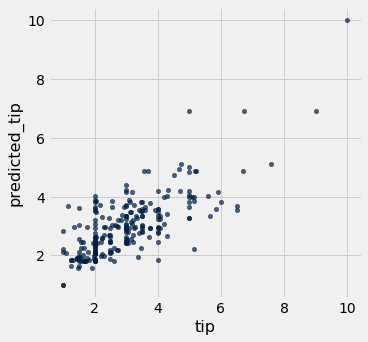

In [41]:
tips_with_predict.scatter('tip', 'predicted_tip')